# Les Morts Par Armes à Feu Aux USA
Les données concernant la période de 2012 à 2014 proviennent de FiveThirtyEight et peuvent être télécharger sur [GitHub](https://github.com/fivethirtyeight/guns-data).

# Introduction

In [19]:
#importation librairie 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [20]:
#ouverture du fichier csv
guns = pd.read_csv("full_data.csv")

In [21]:
#afficher les premieres lignes
guns.iloc[0:10,:]

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0
5,6,2012,2,Suicide,0,M,17.0,Native American/Native Alaskan,100,Home,1.0
6,7,2012,2,Undetermined,0,M,48.0,White,100,Home,2.0
7,8,2012,3,Suicide,0,M,41.0,Native American/Native Alaskan,100,Home,2.0
8,9,2012,2,Accidental,0,M,50.0,White,100,Other specified,3.0
9,10,2012,2,Suicide,0,M,NaN,Black,998,Home,5.0


In [22]:
#################################################################
# Fonction pour générer un graph
# - data = the pandas.datastream
# - col = colums name
# - annotation = "middle" or "top" to see the value on top of the bar or in the middle of the bar 
# - rot = 0 to 90 for the rotation level of the ticklabels
#################################################################
def MakeMyGraph(data, col, annotation="middle", hue=None, addtop=0, rot=0, ymax=0, **parg):
    #choix du style
    sns.set(style="white")

    #genere le graph
    ax = sns.countplot(x=col, hue=hue, data=data, **parg)

    #gestion des annotations
    if annotation == "middle":
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()/2, int(p.get_height()), color="w", fontweight="bold", ha="center", va="center")
            if ymax < p.get_height():
                ymax = p.get_height()
    elif annotation == "top":
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+addtop, int(p.get_height()), color="C0", fontweight="bold", ha="center", va="center")
            if ymax < p.get_height():
                ymax = p.get_height()
    else:
        print("Error A : bad annotation parameter")
    
    #parametres de style du graph 
    ax.tick_params(bottom="off", top="off", left="off", right="off")  
    ax.set_yticks([0,int(ymax)])
    ax.set_ylabel("")
    for t in ax.get_xticklabels():
        t.set(rotation=rot)
    sns.despine(left=True, bottom=True)
    
    #affiche le graph
    plt.show()


# Morts par Armes à feu Annuelles  

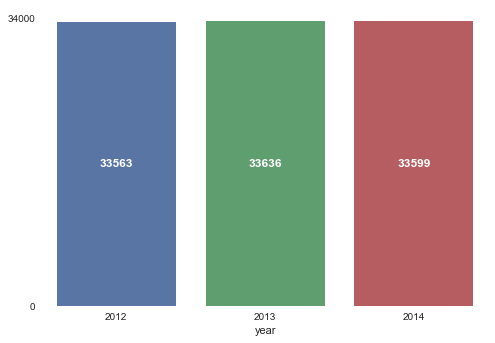

In [23]:
MakeMyGraph(data=guns, col="year", annotation="middle", rot=0, ymax=34000)

Les morts par armes à feu semblent être plutôt stable sur la période 2012 - 2014. Allons un peu plus loin dans le détail en analysant les données mensuelles.

# Morts par Armes à feu par Mois et par Années

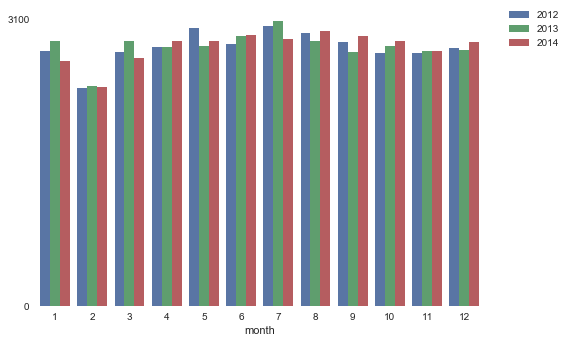

In [24]:
#choix du style
sns.set(style="white")

#genere le graph
ax = sns.countplot(x="month", hue="year", data=guns)

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_yticks([0,3100])
ax.set_ylabel("")

sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#affiche le graph
plt.show()

Il semble qu'il y ait une legère saisonnalité dans les données, avec un pic atteint pendant l'été et un plus bas pendant l'hiver.

# Analyse éthnique et par genre des Morts par Armes à feu

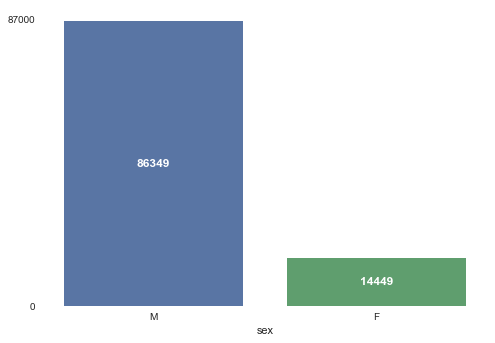

In [25]:
MakeMyGraph(data=guns, col="sex", annotation="middle", rot=0, ymax=87000)

Comme on pouvait le supposer, les hommes sont beaucoup plus représentés.

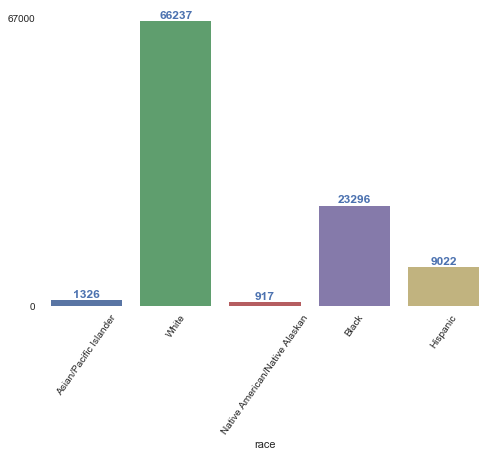

In [26]:
MakeMyGraph(data=guns, col="race", annotation="top", addtop=1300, rot=55, ymax=67000)

Sans la structure de la population nous ne pouvons rien dire de réellement pertinant.

# Structure de la population US
    Nous allons ajouter les données de recensement de 2010 pour pouvoir poursuivre l'analyse. 

In [27]:
#ouverture des données de recensement
census = pd.read_csv("census.csv")
#apperçu des données 
census.iloc[:,:]

,Id,Year,Id.1,Sex,Id.2,Hispanic Origin,Id.3,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
0,cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,NaN,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195


In [28]:
#extraction des données utiles à notre analyse
new_census = census.iloc[:,10:14]
#traitement pour rendre les données compatibles avec notre premiere base de données
#fusion des deux ethnies (Asian et Native Hawaiien)
new_census["Asian/Pacific Islander"] = census["Race Alone - Asian"] + census["Race Alone - Native Hawaiian and Other Pacific Islander"]
new_census.iloc[:,:]

#renomme les colonnes
mapping = {
    "Race Alone - White" : "White",
    "Race Alone - Hispanic" : "Hispanic",
    "Race Alone - Black or African American" : "Black",
    "Race Alone - American Indian and Alaska Native" : "Native American/Native Alaskan"
}
new_census.rename(columns=mapping, inplace=True)
new_census.iloc[:,:]

,White,Hispanic,Black,Native American/Native Alaskan,Asian/Pacific Islander
0,197318956,44618105,40250635,3739506,15834141


In [29]:
#morts par armes à feu par ethni
race_counts = guns["race"].value_counts()
print(race_counts)

White                             66237
Black                             23296
Hispanic                           9022
Asian/Pacific Islander             1326
Native American/Native Alaskan      917
Name: race, dtype: int64


# Le taux de décès par arme à feu

In [30]:
#calcule du taux de décès par arme à feu sur l'ensemble de la période
rate_per_hundredk = (race_counts / new_census) * 100000

In [31]:
#afficher les taux 
rate_per_hundredk.iloc[:,:]

,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White
0,8.37431,57.877348,20.220491,24.521956,33.568493


Interprétation : 33,56 personnes de race blanche recensées aux États-Unis sur 100 000 ont été tuées par des armes à feu entre 2012 et 2014.

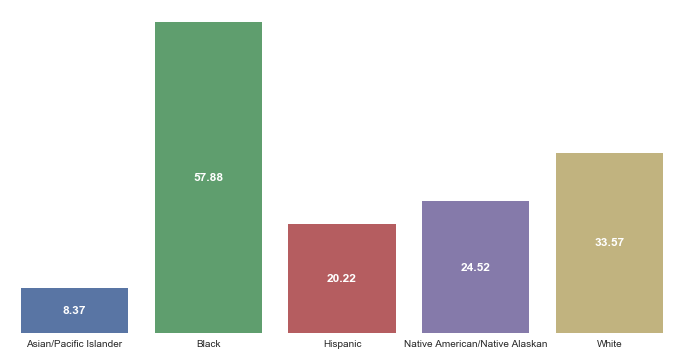

In [32]:
#generer un graph
sns.set(style="white") #style
x = rate_per_hundredk.T[0].index
y = rate_per_hundredk.T[0].values

fig, ax = plt.subplots(figsize=(12,6)) #set the size of the figure

rect = sns.barplot(x, y) #barplot

#gestion des annotations 
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()/2, round(p.get_height(), 2), color="w", fontweight="bold", ha="center", va="center")

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_yticks([])
ax.set_ylabel("")

sns.despine(left=True, bottom=True)

plt.show()

    Il semble qu'un biais ethnique existe.

# Filtrer par intention
    Nous allons cibler ici plus particulièment les homicides.

In [33]:
#filtre par Homicide
homicide = guns[guns["intent"] == "Homicide"]
#homicide par ethnie
homicide_race_counts = homicide["race"].value_counts()
#Calcule du taux d'homicide par arme à feu
homicide_rate_per_hundredk = (homicide_race_counts / new_census) * 100000
#afficher le resultat
homicide_rate_per_hundredk.iloc[:,:]

,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White
0,3.530346,48.471285,12.627161,8.717729,4.635642


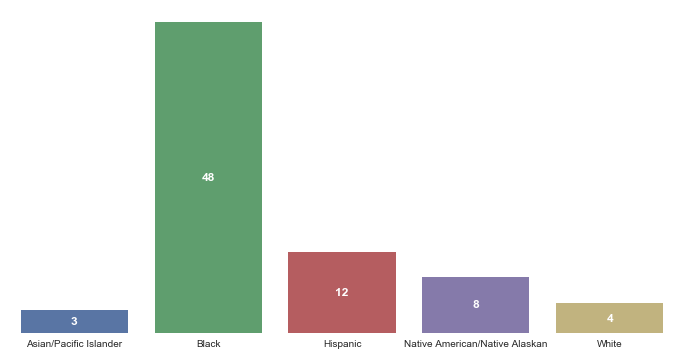

In [34]:
#generer le graph
sns.set(style="white") #style
x = homicide_rate_per_hundredk.T[0].index
y = homicide_rate_per_hundredk.T[0].values

fig, ax = plt.subplots(figsize=(12,6)) #set the size of the figure

rect = sns.barplot(x, y) #barplot

#gestion des annotations 
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()/2, int(p.get_height()), color="w", fontweight="bold", ha="center", va="center")

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_yticks([]) 
ax.set_ylabel("")

sns.despine(left=True, bottom=True)

Il semblerait que les homicides par arme à feu aux États-Unis affectent les ethnies de manière différente, la population noire est ainsi beaucoup plus touchée. La population blanche était l’une des plus touchées par les morts par armes à feu, mais se retrouve comme l’une des moins touchées ici, regardons ça de plus près. 

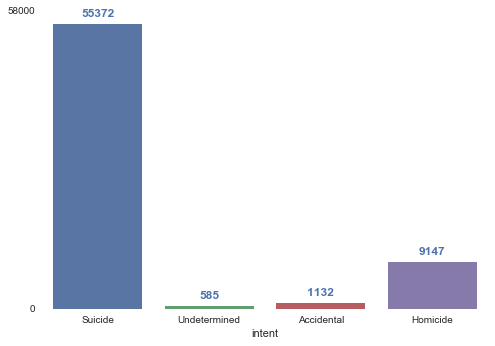

In [35]:
#Filtre les données
thewhites = guns[guns["race"]=="White"]
#generer le graph
MakeMyGraph(data=thewhites, col="intent", annotation="top", addtop=2000, rot=0, ymax=58000)

L'explication vient du fait qu'une très grande part des morts par armes à feu aux États-unis dans la population blanche provient des suicides.